<a href="https://colab.research.google.com/github/taddbackus/capstone/blob/main/Working%20RNN/Testing_the_clean_up_alt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install keras

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from keras.layers import LSTM
from keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


all_mines = pd.read_csv('/content/drive/MyDrive/Mines_Data_Clean/all_mines_no_filter_with_precip.csv')
all_mines = pd.DataFrame(all_mines)

Mounted at /content/drive


<ipython-input-4-4d8dda14fe77>:5: DtypeWarning: Columns (6,16,18,19,20,21,35,36,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  all_mines = pd.read_csv('/content/drive/MyDrive/Mines_Data_Clean/all_mines_no_filter_with_precip.csv')


In [5]:

columns_to_drop = ['Unnamed: 0']
all_mines = all_mines.drop(columns = columns_to_drop)
all_mines = all_mines.sort_values(by=['mine_id', 'start_date']).reset_index()

In [6]:
#all_mines = pd.read_csv('/Users\\austi\\Documents\\Capstone\\Working\\For real\\Capstone Data\\all_mines.csv')

all_mines.head(15)

,index,Company,start_date,Observations,orig_perm_id,mine_id,State,water,trees,grass,...,Number_company_to_permit_id,edit_month,edit_year,permit_weekday,permit_approval_month,permit_approval_year,permit_application_year,WaterQuality,Max Temperature,Precipitation
0,25101,LEVISA ENERGIES INC,2017-07-01,1.000000,0365205,00000000000000000000,ky,0.031829,0.664179,0.063150,...,0.0,11.0,1999,Saturday,12.0,1899,NaT,-0.336781,300.366659,13.333333
1,9943,LEVISA ENERGIES INC,2019-07-01,3.000000,0365205,00000000000000000000,ky,0.032339,0.718107,0.045966,...,0.0,11.0,1999.0,Saturday,12.0,1899,NaT,-0.508053,304.399994,0.000000
2,30008,"ERP ENVIRONMENTAL FUND, INC.",2019-07-01,15.000000,S010380,00000000000000000000,wv,0.032505,0.733745,0.034282,...,1.0,6.0,2023,Tuesday,10.0,1980,NaT,NaN,NaN,NaN
3,6644,LEVISA ENERGIES INC,2021-07-01,2.000000,0365205,00000000000000000000,ky,0.032204,0.733225,0.041907,...,0.0,11.0,1999.0,Saturday,12.0,1899,NaT,-0.736694,297.399994,30.799999
4,28614,"ERP ENVIRONMENTAL FUND, INC.",2021-07-01,36.000000,S010380,00000000000000000000,wv,0.058860,0.421674,0.044628,...,1.0,6.0,2023,Tuesday,10.0,1980,NaT,NaN,NaN,NaN
5,263,LEVISA ENERGIES INC,2023-07-01,2.000000,0365205,00000000000000000000,ky,0.032364,0.742873,0.034686,...,0.0,11.0,1999.0,Saturday,12.0,1899,NaT,0.044010,299.299988,9.200000
6,27587,"ERP ENVIRONMENTAL FUND, INC.",2023-07-01,2.000000,S010380,00000000000000000000,wv,0.059684,0.112020,0.045233,...,1.0,6.0,2023,Tuesday,10.0,1980,NaT,NaN,NaN,NaN
7,30862,DALCO COAL OF TENNESSEE LLC,2017-07-01,13.333333,3051,00000000000000000002,NaN,0.034703,0.709433,0.036018,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,30863,"ERP ENVIRONMENTAL FUND, INC.",2017-07-01,29.500000,S003880,00000000000000000002,NaN,0.032207,0.730446,0.034787,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,30864,PREMIUM ELKHORN COAL CORPORATION,2017-07-01,2.333333,0365208,00000000000000000002,NaN,0.030848,0.691618,0.046537,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.456124,299.766663,17.100000


In [7]:
all_mines['start_date'].unique()

array(['2017-07-01', '2019-07-01', '2021-07-01', '2023-07-01'],
      dtype=object)

In [8]:
all_mines.dtypes

index                            int64
Company                         object
start_date                      object
Observations                   float64
orig_perm_id                    object
mine_id                         object
State                           object
water                          float64
trees                          float64
grass                          float64
flooded_vegetation             float64
crops                          float64
shrub_and_scrub                float64
built                          float64
bare                           float64
snow_and_ice                   float64
company                         object
coalmine_op_status             float64
mine_name                       object
permit_id                       object
national_id                     object
coal_bed_names                  object
inspectable_unit_status        float64
post_smcra                     float64
reported_area                  float64
permit_application_type  

In [9]:
for column_name, dtype in all_mines.dtypes.items():
    if dtype == 'object':
        column_values = all_mines[column_name]

        num_unique_values = column_values.nunique()

        print(f'Column: {column_name}')
        print(f'Number of Unique Values: {num_unique_values}\n')
        value_counts = column_values.value_counts()
        print(value_counts)
        print('-------------------------------------------\n')


Column: Company
Number of Unique Values: 3065

REVELATION ENERGY LLC               525
MARTIN COUNTY COAL CORPORATION      389
LCC KENTUCKY LLC                    362
NALLY & HAMILTON ENTERPRISES INC    320
ICG HAZARD LLC                      318
                                   ... 
ELMINA COAL COMPANY                   1
ILLUSION COAL COMPANY, INC.           1
J & N PROCESSING COMPANY, L.L.C.      1
PERRY AND HYLTON, INCORPORATED        1
JACK RUN COAL CORPORATION, INC.       1
Name: Company, Length: 3065, dtype: int64
-------------------------------------------

Column: start_date
Number of Unique Values: 4

2019-07-01    9995
2021-07-01    9702
2017-07-01    9597
2023-07-01    9368
Name: start_date, dtype: int64
-------------------------------------------

Column: orig_perm_id
Number of Unique Values: 8860

8970346    24
2667000    24
0130182    24
0268001    24
0070128    24
           ..
U301401     1
U300999     1
S400792     1
O000781     1
S000285     1
Name: orig_perm_id, L

In [10]:
columns_to_encode = ['Company', 'start_date', 'State','permit_application_year', 'permit_approval_year', 'permit_approval_month', 'edit_year', 'edit_month', 'permit_id']

all_mines_encoded = pd.get_dummies(all_mines, columns=columns_to_encode)
object_columns = all_mines_encoded.select_dtypes(include=['object'])
all_mines_encoded = all_mines_encoded.drop(columns=object_columns.columns)


In [11]:
for column_name in all_mines_encoded.columns:
    if all_mines_encoded[column_name].dtype == 'int64':
        all_mines_encoded[column_name] = all_mines_encoded[column_name].astype('float32')
all_mines_encoded = all_mines_encoded.replace({True: 1, False: 0})

In [12]:
nan_count = all_mines_encoded.isna().sum()

nan_count_sorted = nan_count.sort_values(ascending=False)

print(nan_count_sorted.head(12))

reported_area                  38662
permit_application_type        38658
highwall                       17028
inspectable_unit_status        16524
contour                        13740
auger                          13740
steep_slope                    13740
mountaintop                    13740
area_mine                      13740
post_smcra                     11812
Number_company_to_permit_id    11804
coalmine_op_status             11804
dtype: int64


In [13]:
for i in all_mines_encoded.columns:
    if all_mines_encoded[i].isna().sum() > 0:
        print('{} has {}% NAs'.format(i,(all_mines_encoded[i].isna().sum() / len(all_mines_encoded))*100))

coalmine_op_status has 30.531271015467382% NAs
inspectable_unit_status has 42.739640991154104% NAs
post_smcra has 30.551963167968548% NAs
reported_area has 100.0% NAs
permit_application_type has 99.98965392374942% NAs
area_mine has 35.538771920749056% NAs
contour has 35.538771920749056% NAs
mountaintop has 35.538771920749056% NAs
steep_slope has 35.538771920749056% NAs
highwall has 44.04324659872743% NAs
auger has 35.538771920749056% NAs
contact has 30.531271015467382% NAs
Number_company_to_permit_id has 30.531271015467382% NAs
WaterQuality has 14.000827686100045% NAs
Max Temperature has 13.993068128912109% NAs
Precipitation has 13.993068128912109% NAs


In [14]:
#very quick imputation
all_mines_encoded = all_mines_encoded.fillna(0)

In [15]:
from sklearn.preprocessing import MinMaxScaler

#one hot encoding categorical variables for model
cols = all_mines_encoded.columns
num_cols = all_mines_encoded._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))

#creating dataframe of numeric columns
scaler = MinMaxScaler(feature_range = (0, 1))
num_df = scaler.fit_transform(all_mines_encoded[num_cols])

all_mines_encoded=pd.DataFrame(num_df,columns=all_mines_encoded[num_cols].columns, index=all_mines_encoded[num_cols].index)
all_mines_encoded

,index,Observations,water,trees,grass,flooded_vegetation,crops,shrub_and_scrub,built,bare,...,permit_id_Z001181,permit_id_Z001881,permit_id_Z002781,permit_id_Z004381,permit_id_Z006681,permit_id_Z007781,permit_id_Z007881,permit_id_Z008181,permit_id_Z008781,permit_id_Z008881
0,0.649259,0.000000,0.047622,0.856086,0.096604,0.154306,0.134106,0.084777,0.049578,0.067547,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.257184,0.000279,0.048385,0.925596,0.070317,0.169602,0.097614,0.073951,0.046960,0.069084,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.776183,0.001950,0.048634,0.945751,0.052442,0.165964,0.084276,0.072952,0.046900,0.077498,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.171853,0.000139,0.048183,0.945081,0.064107,0.175208,0.094993,0.065222,0.042302,0.066954,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.740126,0.004874,0.088066,0.543511,0.068269,0.210069,0.147483,0.138547,0.188895,0.248371,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38657,0.087556,0.000557,0.047462,0.954141,0.049596,0.153963,0.078858,0.076975,0.044840,0.079790,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38658,0.991102,0.000232,0.049508,0.949783,0.052908,0.163508,0.086506,0.067391,0.048114,0.073450,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38659,0.457722,0.000418,0.048823,0.952999,0.053221,0.158111,0.087042,0.067017,0.049197,0.070629,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38660,0.585707,0.000139,0.049906,0.946362,0.053027,0.164913,0.087550,0.068491,0.048913,0.074300,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
##### TESTING DROPSET

columns = all_mines_encoded.columns
column_to_exclude = ['mine_name','permit_id','trees', 'water', 'snow_and_ice','grass','bare', 'built', 'shrub_and_scrub', 'crops']
columns = list(set(columns) - set(column_to_exclude))
selected_columns = all_mines_encoded[columns]

sequence_length=4

features = all_mines_encoded[columns]
target = all_mines_encoded['trees']
X, y, y_index = [], [], []
for i in range(len(features) - sequence_length):
    X.append(features.iloc[i:i + sequence_length].values)
    y.append(target.iloc[i + sequence_length])
    y_index.append(all_mines.mine_id.iloc[i + sequence_length])

X=np.array(X)
y=np.array(y)
y_index=np.array(y_index)

In [17]:
#getting train and test indexes, so each mine has training data on first 3 years, and prediction on 4th
X_train = X[1::3]
X_test = X[4::4]
y_train = y[1::3]
y_test = y[4::4]

In [18]:
feature_length = X_train.shape[2]

regressor = Sequential()
regressor.add(LSTM(units = 50, input_shape=(sequence_length, X_train.shape[2]), return_sequences = True, activation = 'relu'))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(50))
regressor.add(Dropout(0.2))
regressor.add(Dense(1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

es = EarlyStopping(monitor='val_loss', mode='min', patience=20, restore_best_weights=True)
regressor.fit(X_train, y_train, epochs=50, batch_size=32, validation_data= (X_test, y_test), callbacks=[es])

Epoch 1/50
403/403 [==============================] - 30s 37ms/step - loss: 0.0579 - val_loss: 0.0285
Epoch 2/50
403/403 [==============================] - 9s 23ms/step - loss: 0.0308 - val_loss: 0.0234
Epoch 3/50
403/403 [==============================] - 9s 23ms/step - loss: 0.0241 - val_loss: 0.0203
Epoch 4/50
403/403 [==============================] - 9s 23ms/step - loss: 0.0198 - val_loss: 0.0173
Epoch 5/50
403/403 [==============================] - 9s 22ms/step - loss: 0.0168 - val_loss: 0.0171
Epoch 6/50
403/403 [==============================] - 9s 23ms/step - loss: 0.0146 - val_loss: 0.0174
Epoch 7/50
403/403 [==============================] - 9s 22ms/step - loss: 0.0129 - val_loss: 0.0175
Epoch 8/50
403/403 [==============================] - 9s 23ms/step - loss: 0.0111 - val_loss: 0.0160
Epoch 9/50
403/403 [==============================] - 9s 23ms/step - loss: 0.0101 - val_loss: 0.0160
Epoch 10/50
403/403 [==============================] - 9s 22ms/step - loss: 0.0091 - val_l

In [20]:
#validation dataset
y_val = regressor.predict(X_test)
y_val = y_val.flatten()

res=[]
for i,x in enumerate(y_test):
  res.append(y_test[i]-y_val[i])

res=np.array(res)
res.flatten()

mse = mean_squared_error(y_test, y_val)
mae = mean_absolute_error(y_test, y_val)
r2 = r2_score(y_test, y_val)

print('\nMean Squared Error (MSE):', mse)
print('Mean Absolute Error (MAE):', mae)
print('R-squared (R^2):', r2)

302/302 [==============================] - 2s 7ms/step

Mean Squared Error (MSE): 0.014469730383890222
Mean Absolute Error (MAE): 0.061318354995097905
R-squared (R^2): 0.5158417944434676


In [150]:
y_pred = regressor.predict(X)
y_pred = y_pred.flatten()

res=[]
for i,x in enumerate(y):
  res.append(y[i]-y_pred[i])

res=np.array(res)
res.flatten()

mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print('\nMean Squared Error (MSE):', mse)
print('Mean Absolute Error (MAE):', mae)
print('R-squared (R^2):', r2)

1209/1209 [==============================] - 7s 5ms/step

Mean Squared Error (MSE): 0.018636504063469776
Mean Absolute Error (MAE): 0.07613359240332086
R-squared (R^2): 0.38255885542376666


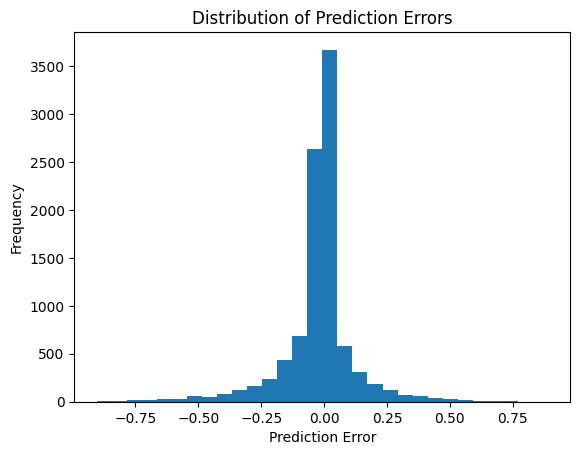

In [95]:
error = y_test - y_val.flatten()
plt.hist(error, bins = 30)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')

plt.show()

# stack overflow
# A symmetric and narrow distribution around zero
# indicates better prediction accuracy.

Text(0.5, 0.98, 'Predictions Plot')

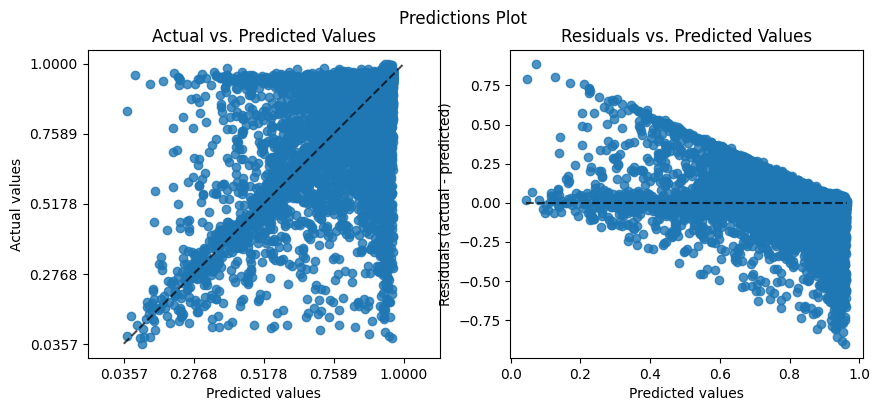

In [96]:
from sklearn.metrics import PredictionErrorDisplay
fig, axs = plt.subplots(ncols = 2, figsize = (10,4))
PredictionErrorDisplay.from_predictions(y_test,y_pred=y_val,
                                        kind="actual_vs_predicted",
                                        ax=axs[0],random_state=0,
                                        subsample = 10000)
axs[0].set_title('Actual vs. Predicted Values')
PredictionErrorDisplay.from_predictions(y_test, y_val,
                                        kind="residual_vs_predicted",
                                        ax=axs[1],
                                        random_state=0,
                                        subsample = 10000)
axs[1].set_title('Residuals vs. Predicted Values')
fig.suptitle('Predictions Plot')

Text(0.5, 0.98, 'Predictions Plot')

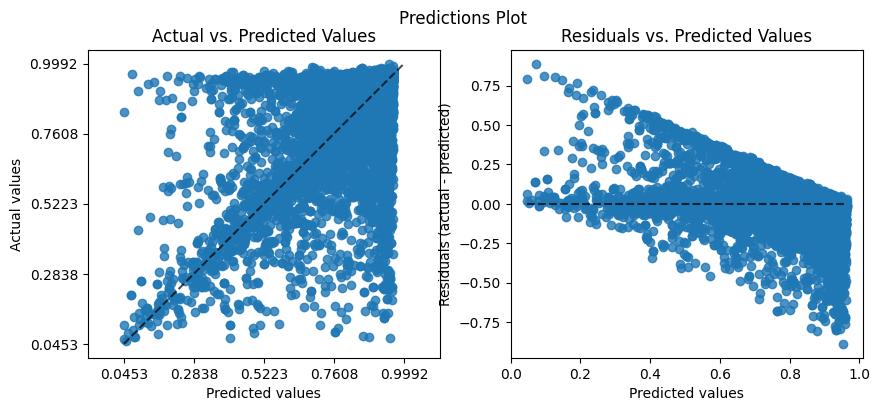

In [97]:
from sklearn.metrics import PredictionErrorDisplay
fig, axs = plt.subplots(ncols = 2, figsize = (10,4))
PredictionErrorDisplay.from_predictions(y,y_pred=y_pred,
                                        kind="actual_vs_predicted",
                                        ax=axs[0],random_state=0,
                                        subsample = 10000)
axs[0].set_title('Actual vs. Predicted Values')
PredictionErrorDisplay.from_predictions(y, y_pred,
                                        kind="residual_vs_predicted",
                                        ax=axs[1],
                                        random_state=0,
                                        subsample = 10000)
axs[1].set_title('Residuals vs. Predicted Values')
fig.suptitle('Predictions Plot')


In [142]:
import pickle

pickle_out = open("tree_regressor.pickle","wb")
pickle.dump(regressor, pickle_out)
pickle_out.close()

In [143]:
from google.colab import files
files.download('tree_regressor.pickle')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>